In [1]:
#import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import plotly
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scipy.stats as stats

In [2]:
#location of the CSV file
womens_csv = "../Project1/Resources/2018_Womens_Shoes.csv"
spring19_womens_csv = "../Project1/Resources/Spring19_women.csv"

In [3]:
#open the 2018 CSV and see a preview
shoes_df = pd.read_csv(womens_csv)
#shoes_df.head()

In [4]:
#open the 2019 CSV and see a preview
spring19_df = pd.read_csv(spring19_womens_csv)
#spring19_df.head()

In [5]:
#info on the csv files (see where data is missing, etc.)
#shoes_df.info()
#spring19_df.info()

In [6]:
#Starting with 2018 file - drop unneeded columns
shoes_df = shoes_df.drop(columns=["id",
                                  "prices.size",
                                  "weight",
                                  "prices.condition",
                                  "imageURLs",
                                  "manufacturerNumber",
                                  "upc",
                                  "sourceURLs",
                                  "prices.availability",
                                  "sizes",
                                  "keys",
                                  "manufacturer",
                                  "prices.dateAdded",
                                  "prices.dateSeen",
                                  "name",
                                  "Date_Added",
                                  "prices.isSale",
                                  "primaryCategories",
                                  "prices.sourceURLs",
                                  "categories",
                                  "prices.amountMin"
                         ])

In [7]:
#rename the columns and preview the cleaned dataframe
shoes_df = shoes_df.rename(columns={#"prices.merchant": "Merchant",
                                    "brand": "Brand",
                                    "prices.color" : "Color",
                                    "Type_Name": "Type",
                                    "date_updated": "Date",
                                    "prices.currency": "Currency",
                                    "prices.amountMax": "Prices"
                                   })
shoes_df.head()

,Date,Brand,Type,Prices,Color,Currency,Merchant
0,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
1,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
2,2/11/18,2 lips too,Heels,64.95,Pink,USD,kohls
3,2/11/18,2 lips too,Heels,64.95,Gold,USD,kohls
4,2/11/18,2 lips too,Heels,64.95,White,USD,kohls


In [8]:
#Create a dataframe to contain the brand names and counts for each brand
brand_df = pd.DataFrame()

brand_groupby = shoes_df.groupby("Brand")
brand_df['brand'] = brand_groupby.Brand.first()

#Add info to a list for easier use later
brand_count = brand_groupby.Brand.value_counts().tolist()
brand_df = brand_df.reset_index(drop=True)
brand_df['brand_count'] = brand_count

brand_df = brand_df.sort_values(by=['brand_count'], ascending=False)
# brand_df['brand'] = brand_df.append(other=brand_series)
# brand_df['brand_count'] = brand_count

In [9]:
#Create variable for groupby - average price by brand
pricesbybrand = shoes_df.groupby("Brand")["Prices"].mean()
pricesbybrand

#Create variable for list of brand names
brands = shoes_df["Brand"].unique()

In [10]:
#Calculate number of times a particular price appears in the list
pricelist = shoes_df["Prices"].value_counts()
pricelist

#Calculate number of sales for each brand name
brands = shoes_df["Brand"].value_counts()
brands

journee collection                2182
lifestride                        1457
a2 by aerosoles                    670
easy street                        556
style charles by charles david     478
so                                 422
Dr. Scholl's                       338
croft barrow                       315
nike                               285
new balance                        255
sonoma goods for life              229
skechers                           185
apt. 9                             183
Nike                               179
simply vera vera wang              164
SKECHERS                           151
candies                            144
Lifestride                         136
ryka                               129
asics                              111
naturalsoul by naturalizer         107
adidas                             100
madden nyc                          84
spring step                         79
Brinley Co.                         76
lc lauren conrad         

In [11]:
#Create variable for the list of colors
colors = shoes_df["Color"].unique()
colors

#Calculate the total times each color appears in the dataframe
totalcolors = shoes_df["Color"].value_counts()
totalcolors

Black          2871
Gray           1775
Tan            1300
Dark Blue       997
Brown           919
White           545
Light Blue      302
Pink            297
Dark Red        224
Red             211
Dark Green      154
Gold            151
Print           127
Purple           64
Orange           46
Light Green       9
Yellow            5
Cream             3
Name: Color, dtype: int64

In [12]:
#Create dataframe to hold groupby of type by color
typebycolor_df = shoes_df.groupby("Color")["Type"].unique()
typebycolor_df

Color
Black          [Heels, Booties, Sandals, Flats, Boots, Ballet...
Brown          [Heels, Sandals, Booties, Boots, Flats, Ballet...
Cream                                      [Flats, Ballet Flats]
Dark Blue      [Heels, Sandals, Flats, Ballet Flats, Sneakers...
Dark Green     [Booties, Sneakers, Heels, Ballet Flats, Flats...
Dark Red       [Ballet Flats, Sandals, Heels, Booties, Flats,...
Gold           [Heels, Ballet Flats, Sandals, Sneakers, Flats...
Gray           [Heels, Booties, Sandals, Flats, Boots, Sneake...
Light Blue     [Heels, Sandals, Athletic Shoes, Flats, Sneake...
Light Green              [Flats, Sandals, Heels, Athletic Shoes]
Orange                   [Flats, Sandals, Athletic Shoes, Heels]
Pink           [Heels, Sandals, Athletic Shoes, Ballet Flats,...
Print          [Heels, Flats, Sandals, Ballet Flats, Athletic...
Purple                  [Athletic Shoes, Sneakers, Heels, Flats]
Red            [Booties, Heels, Athletic Shoes, Flats, Sandal...
Tan            [Boo

In [13]:
#Create a groupby variable for average prices by type. 
#(Same groupby variable is used so later plots are correct.)
shoes_groupby = shoes_df.groupby("Type")
avgpricesbytype = shoes_groupby.Prices.mean()
avgpricesbytype = avgpricesbytype.tolist()

shoetype = shoes_groupby.Type.first()
shoetype = shoetype.tolist()
avgpricesbytype

[79.37862745098097,
 60.73436893203889,
 80.88494265428825,
 88.55657142857169,
 60.77885596140609,
 63.413144023756445,
 60.47570149253701,
 69.9045686274513]

In [14]:
#Groupby for total sales (USD) at each merchant
pricesbymerchant_df = shoes_df.groupby("Merchant")["Prices"].sum()
pricesbymerchant_df

Merchant
backcountry     41880.34
evo.com          1979.60
kohls          645107.64
overstock         201.94
walmart          3065.92
Name: Prices, dtype: float64

In [15]:
#Calculate total number of sales at each merchant
merchantcount = shoes_df["Merchant"].value_counts()
merchantcount

#List of unique merchant names
merchants = shoes_df["Merchant"].unique()
merchants

array(['kohls', 'backcountry', 'walmart', 'overstock', 'evo.com'],
      dtype=object)

In [16]:
#Calculate total sales for each type of shoe
shoecount = shoes_df["Type"].value_counts()
shoecount

#Create variable for list of shoe types
shoetypes = shoes_df["Type"].unique()
shoetypes

array(['Heels', 'Booties', 'Sandals', 'Flats', 'Boots', 'Ballet Flats',
       'Sneakers', 'Athletic Shoes'], dtype=object)

In [17]:
#colorcount = shoes_df["Color"].value_counts()


#colors = shoes_df["Color"].unique()
#colorcount

In [18]:
#Create groupby variable for total sales by color
#(Same groupby variable used in both for correct plots later)
color_groupby = shoes_df.groupby("Color")
colorcount = color_groupby.Color.value_counts()
colorcount = colorcount.tolist()

colortype = color_groupby.Color.first()
colortype = colortype.tolist()
colorcount

[2871,
 919,
 3,
 997,
 154,
 224,
 151,
 1775,
 302,
 9,
 46,
 297,
 127,
 64,
 211,
 1300,
 545,
 5]

In [19]:
#Drop unneeded columns from 2019 csv
spring19_df = spring19_df.drop(columns=["id",
                                  "dateAdded",
                                  "dateUpdated",
                                  "asins",
                                  "dimension",
                                  "ean / upc",
                                  "imageURLs",
                                  "keys",
                                  "manufacturerNumber",
                                  "prices.availability",
                                  "prices.condition",
                                  "prices.dateAdded",
                                  "prices.dateSeen",
                                  "prices.offer",
                                  "prices.returnPolicy",
                                        "sizes",
                                        "prices.shipping",
                                        "prices.merchant",
                                        "manufacturer",
                                  "prices.isSale",
                                  "primaryCategories",
                                  "prices.sourceURLs",
                                  "categories",
                                        "prices.amountMin",
                                        "prices.size",
                                        "prices.color",
                                        "sourceURLs"
                         ])
#spring19_df.head()

In [20]:
#Rename columns that we will be using
spring19_df = spring19_df.rename(columns={"brand": "Brand",
                                          "colors" : "Color",
                                          "prices.currency": "Currency",
                                          "prices.amountMax": "Prices"
                                   })
spring19_df.head()

,Date,Brand,Color,Type,name,Prices,Currency,Merchant
0,5/1/19,City Classified,Black,Booties,City Classified Stylish-S Women's Zipper Ankle...,29.95,USD,Walmart
1,5/1/19,Skechers,Taupe,Athletic Shoes,"Skechers Women'S You Radiate, Walking",84.00,USD,Walmart
2,5/1/19,Floral,Black,Heels,FLORAL Pearl Women's Wide Width Evening Dress ...,49.95,USD,Walmart
3,5/1/19,Jambu,Black,Booties,Women's Jambu Amal Water Resistant Bootie,127.20,USD,Walmart
4,5/1/19,Trotters,White,Boots,"trotters women's blast iii boot,black quill,11...",47.66,USD,Walmart


In [21]:
#Calculate total sales for type and brand
typebybrand19_df = spring19_df.groupby("Brand")["Type"].value_counts()
typebybrand19_df

Brand               Type          
1.STATE             Sandals            2
911Costume          Boots              1
A2 by Aerosoles     Ballet Flats      33
                    Sandals            7
                    Flats              4
                    Booties            3
                    Heels              1
A35                 Boots              2
AARON               Boots              1
AERUSI              Flats              1
ARRAY               Sandals           10
                    Flats              8
                    Heels              2
                    Booties            1
AXNY                Boots              5
Academie Gear       Flats              1
Adidas              Flats             18
                    Heels              2
                    Sandals            2
                    Booties            1
Adriana             Booties            2
Aerosoft            Sandals            4
                    Athletic Shoes     1
Aerosoles           Bo

In [22]:
#Calculate average prices by brand
pricesbybrand19_df = spring19_df.groupby("Brand")["Prices"].mean()
pricesbybrand19_df

Brand
1.STATE                20.005000
911Costume             59.880000
A2 by Aerosoles        40.142708
A35                    72.795000
AARON                 229.980000
AERUSI                 25.000000
ARRAY                  45.470000
AXNY                   48.960000
Academie Gear          48.310000
Adidas                 61.459130
Adriana                33.950000
Aerosoft               30.308000
Aerosoles              94.265738
Ahnu                   67.314000
Aldo                   63.950000
Alegria               105.336667
Alfani                 46.821622
Alotta Knits            9.950000
American Rag           37.557500
Ann Creek              67.996000
Anne Michelle          30.000000
Annie                  26.867500
Answer 2              123.228750
Anthony Wang           29.000000
Apex                  144.950000
Aqua Design            19.950000
Aquapillar             39.200370
Aquatalia             149.990000
Aravon                 47.990000
Ariat                  13.330000
    

In [23]:
#Create groupby variable for total sales by color
#(Same groupby variable used for correct plots later)
color19_groupby = spring19_df.groupby("Color")
colorcount19 = color19_groupby.Color.value_counts()
colorcount19 = colorcount19.tolist()

colortype19 = color19_groupby.Color.first()
colortype19 = colortype19.tolist()
colorcount19

[5328, 4456, 134, 4, 3, 19, 17, 1, 2, 4, 8, 7, 3, 12]

In [63]:
#Count of each color for each type of shoe
typebycolor19_df = spring19_df.groupby("Type")["Color"].value_counts()
typebycolor19_df

Type            Color    
Athletic Shoes  Blue          444
                Black         111
                Taupe           1
Ballet Flats    Blue          107
                Black          35
                Gold            1
                Red             1
Boat Shoes      Black          11
                Blue            7
Booties         Black         798
                Blue          679
                Brown          21
                Gray            7
                Tan             4
                White           2
Boots           Black        1246
                Blue          828
                Brown           5
                White           4
                Gray            2
                Cream           1
                Dark Blue       1
                Tan             1
Flats           Black        1276
                Blue          770
                Brown          11
                Gray            4
                Gold            3
                Red   

In [64]:
#Change groupby to a dataframe for easier plotting
type19_df = pd.DataFrame(typebycolor19_df)

#Rename column to fix error (double Type columns)
type19_df.columns = ['Count']

#df.index.names = ['Color', 'Shoe_Type']
type19_df.reset_index(inplace=True)
type19_df.head()

,Type,Color,Count
0,Athletic Shoes,Blue,444
1,Athletic Shoes,Black,111
2,Athletic Shoes,Taupe,1
3,Ballet Flats,Blue,107
4,Ballet Flats,Black,35


In [36]:
#Create groupby variable for average prices by type
price19_groupby = spring19_df.groupby("Type")
avgprices19 = price19_groupby.Prices.mean()
avgprices19 = avgprices19.tolist()

shoetype19 = price19_groupby.Type.first()
shoetype19 = shoetype19.tolist()
avgprices19

[104.42343525179821,
 39.22625,
 90.79333333333332,
 73.28135009927186,
 78.22723180076686,
 73.2273577627777,
 59.701067961164995,
 64.08496043822225,
 79.16608591885459]

In [37]:
#Create groupby variable to calculate total sales by type
#(Same groupby variable used so the graphs are correct later)
types_groupby = spring19_df.groupby("Type")
type19 = types_groupby.Type.first()
type19 = type19.tolist()

type_count19 = types_groupby.Type.value_counts()
type_count19 = type_count19.tolist()
type_count19

[556, 144, 18, 1511, 2088, 2074, 1545, 1643, 419]

In [38]:
#Calculate total sales per merchant
totalmerchant19 = spring19_df["Merchant"].value_counts()

#Create list of unique merchant names
merchants19 = spring19_df["Merchant"].unique()

In [39]:
#Create a dataframe to hold brand info
brand19_df = pd.DataFrame()

#Create groupby variable for total sales by brand
brand19_groupby = spring19_df.groupby("Brand")
brand19_df['brand'] = brand19_groupby.Brand.first()
brand19_count = brand19_groupby.Brand.value_counts().tolist()
brand19_df = brand19_df.reset_index(drop=True)
brand19_df['brand19_count'] = brand19_count

brand19_df = brand19_df.sort_values(by=['brand19_count'], ascending=False)
brand19_df[:25] #Limit to first 25 results

,brand,brand19_count
67,Brinley Co.,1007
288,Propet,643
284,Pleaser,556
306,SAS,455
363,Trotters,449
330,Soda,371
332,SoftWalk,245
12,Aerosoles,237
213,L'Artiste by Spring Step,229
131,ELLIE,224


In [68]:
#Create a pie chart of the Top Colors for S/S 2018
import plotly.graph_objects as go

labels = colortype
values = colorcount

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
plt.savefig("colorpie18.png")
fig.show()

<Figure size 432x288 with 0 Axes>

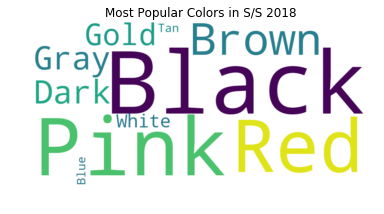

In [77]:
#Create wordcloud for top colors of 2018
text = (shoes_df.Color.astype('str'))
stopwords = set(STOPWORDS)
stopwords.update(["Length", "dtype", "object", "Name", "Color"])
color_cloud = WordCloud(background_color='white', width = 800, height = 400, max_words = 50, colormap='viridis', stopwords=stopwords, random_state=1).generate(str(text))
plt.figure()
plt.axis('off')
plt.title("Most Popular Colors in S/S 2018")
plt.imshow(color_cloud, interpolation='bilinear')
plt.savefig('colorcloud18.png')

In [42]:
#Create pie chart to show color breakdown for S/S 2019
import plotly.graph_objects as go

labels = colortype19
values = colorcount19

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
plt.savefig("colorpie19.png")
fig.show()

<Figure size 432x288 with 0 Axes>

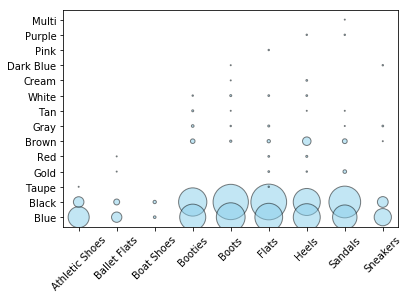

In [67]:
#Create a bubble plot to show the colors by type in 2019
plt.scatter(type19_df["Type"], type19_df["Color"], type19_df["Count"], label = "Shoes",
                    color = "skyblue", edgecolors = "black", alpha = 0.5) 
plt.xticks(rotation=45)
plt.savefig("colorscatter19.png")
plt.show()

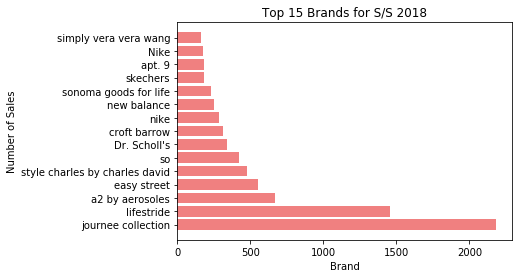

In [43]:
#Create a bar chart of top 15 brand names in 2018
#[:15] limits to top 15 results
plt.barh(brand_df.brand[:15], brand_df.brand_count[:15], label = "Most Popular Brands",
        color = "lightcoral")
plt.title("Top 15 Brands for S/S 2018")
plt.xlabel("Brand")
plt.ylabel("Number of Sales")
plt.savefig('popularbrands18.png')
plt.show()

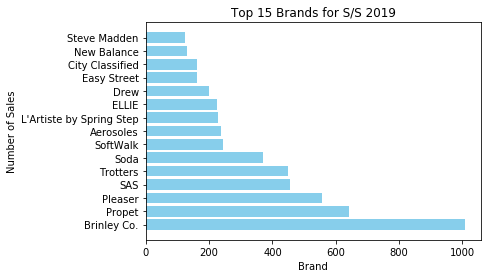

In [44]:
#Create a bar chart of the top 15 brand names in 2019
#[:15] limits to top 15 results
plt.barh(brand19_df.brand[:15], brand19_df.brand19_count[:15], label = "Most Popular Brands",
        color = "skyblue")
plt.title("Top 15 Brands for S/S 2019")
plt.xlabel("Brand")
plt.ylabel("Number of Sales")
plt.savefig('popularbrands19.png')
plt.show()

In [69]:
#Create a pie chart to show average prices by type for 2018
import plotly.graph_objects as go

labels = shoetype
values = avgpricesbytype

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
plt.savefig("avgpricepie18.png")
fig.show()

<Figure size 432x288 with 0 Axes>

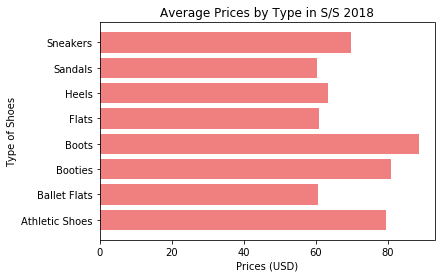

In [70]:
#Create a bar chart to show average prices by type in 2018
plt.barh(shoetype, avgpricesbytype, label = "Average Prices by Type",
        color = "lightcoral")
plt.title("Average Prices by Type in S/S 2018")
plt.xlabel("Prices (USD)")
plt.ylabel("Type of Shoes")
plt.savefig('pricesbytype18.png')
plt.show()

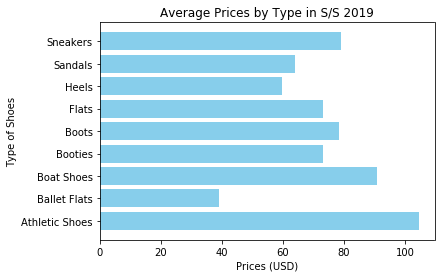

In [60]:
#Create a bar chart to show average prices by type 2019
plt.barh(shoetype19, avgprices19, label = "Average Prices by Type 2019",
        color = "skyblue")
plt.title("Average Prices by Type in S/S 2019")
plt.xlabel("Prices (USD)")
plt.ylabel("Type of Shoes")
plt.savefig('pricesbytype19.png')
plt.show()

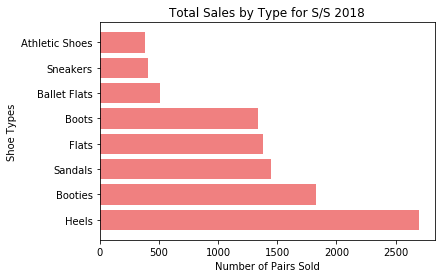

In [71]:
#Create a bar chart to show total sales by type in 2018
plt.barh(shoetypes, shoecount, label = "Total Sales by Type", color = "lightcoral")
plt.title("Total Sales by Type for S/S 2018")
plt.ylabel("Shoe Types")
plt.xlabel("Number of Pairs Sold")
plt.savefig('salesbytype18.png')
plt.show()

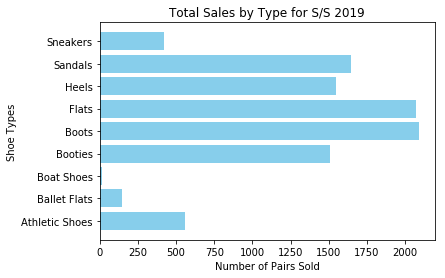

In [78]:
#Create a bar chart for total sales by type in 2019
plt.barh(type19, type_count19, label = "Types19",
        color = "skyblue")
plt.title("Total Sales by Type for S/S 2019")
plt.ylabel("Shoe Types")
plt.xlabel("Number of Pairs Sold")
plt.savefig('salesbytype19.png')
plt.show()

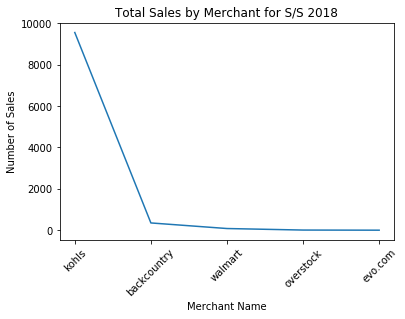

In [74]:
#Line plot to show total sales by merchant in 2018
plt.plot(merchants, merchantcount, label = "Sales by Merchant")
plt.title("Total Sales by Merchant for S/S 2018")
plt.xticks(rotation=45)
plt.xlabel("Merchant Name")
plt.ylabel("Number of Sales")
plt.savefig('merchants18.png')
plt.show()

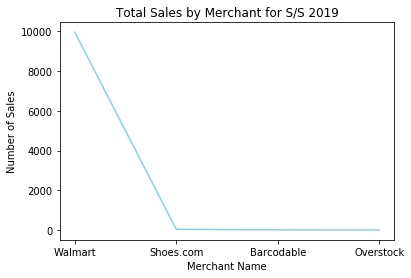

In [75]:
#Line plot to show total sales by merchant in 2019
plt.plot(merchants19, totalmerchant19, label = "Merchants",
        color = "skyblue")
plt.title("Total Sales by Merchant for S/S 2019")
plt.xlabel("Merchant Name")
plt.ylabel("Number of Sales")
plt.savefig('merchants19.png')
plt.show()

In [79]:
#Statistical Analysis and Calculations are below - done by Mfon.
#Observed data in a (hypothetical) survey of 1000 shoe sales 
observed = pd.Series([2871,1775,1300,997,919,545],
                     index=["Black", "Gray", "Tan","Dark Blue", "Brown", "White"])

In [85]:
# Create a data frame
df = pd.DataFrame([observed]).T
df

,0
Black,2871
Gray,1775
Tan,1300
Dark Blue,997
Brown,919
White,545


In [81]:
# Add a column whose default values are the expected values
df["expected"]=[2500,1500,1000,1000,1000,500]
df

,0,expected
Black,2871,2500
Gray,1775,1500
Tan,1300,1000
Dark Blue,997,1000
Brown,919,1000
White,545,500


In [82]:
# Rename columns
df.columns =["observed", "expected"]
df

,observed,expected
Black,2871,2500
Gray,1775,1500
Tan,1300,1000
Dark Blue,997,1000
Brown,919,1000
White,545,500


In [83]:
# The degree of freedom is 6-1 = 5
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q =0.95, df =5)
critical_value #matches the value table listed in the class notes

11.070497693516351

In [84]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])

Power_divergenceResult(statistic=206.09306666666666, pvalue=1.411495223105604e-42)